<a href="https://colab.research.google.com/github/Madiha64/Madiha-CV-cat-dog-cnn/blob/main/yolov8(B%2Binstance_seg).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [ ]:
# Install necessary libraries
!pip install torch torchvision transformers roboflow
from sklearn.metrics import precision_score, recall_score, f1_score
!pip install torch torchvision transformers roboflow tqdm scikit-learn
import torch
from transformers import SegformerForSemanticSegmentation, SegformerImageProcessor
from roboflow import Roboflow
import os
import torch
from transformers import SegformerForSemanticSegmentation, SegformerFeatureExtractor
from rotils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import numpy as np
import torchvision.transforms as T
from torch.utils.data import DataLoader, Dataset
import os
import json
from PIL import Image
import cv2
from tqdm import tqdmboflow import Roboflow
from torch.u

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 53.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 69.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
import glob
import torch
import numpy as np
from tqdm import tqdm
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:

#  Import Libraries
import os
from ultralytics import YOLO
from roboflow import Roboflow

# Download Dataset from Roboflow
rf = Roboflow(api_key="Md29cWfzX6FKw6DNPDgf")
project = rf.workspace("rebar-exposure-and-spalling").project("aperi")
version = project.version(1)
dataset = version.download("yolov8")

#  Check Dataset
dataset_root = "/content/aperi-1"
assert os.path.exists(dataset_root), f"Dataset {dataset_root} not found!"
assert os.path.exists(os.path.join(dataset_root, "data.yaml")), "data.yaml missing!"
print("Dataset contents:", os.listdir(dataset_root))


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to aperi-1 in yolov8:: 100%|██████████| 4143/4143 [00:01<00:00, 3702.44it/s]

Dataset contents: ['valid', 'README.dataset.txt', 'data.yaml', 'train', 'README.roboflow.txt']


In [ ]:
from ultralytics import YOLO

# Load YOLOv8-Seg model
model = YOLO("yolov8s-seg.pt")

# Train on your dataset (4 damage classes)
model.train(
    data="/content/aperi-1/data.yaml",  # your dataset.yaml
    epochs=50,
    imgsz=640,
    batch=16,
    name="rebar_seg",
    project="/content/hust-rebar",
    save=True,
    save_period=5,
    device=0,# save checkpoint every 5 epochs
    resume=False      # ✅ resume from checkpoint if crash
)

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/aperi-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=rebar_seg2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretra

train: Scanning /content/aperi-1/train/labels.cache... 1860 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1860/1860 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 888.3±487.1 MB/s, size: 43.8 KB)


val: Scanning /content/aperi-1/valid/labels.cache... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<?, ?it/s]


Plotting labels to /content/hust-rebar/rebar_seg2/labels.jpg... 


Traceback (most recent call last):
  File "/usr/lib/python3.11/multiprocessing/queues.py", line 239, in _feed
    reader_close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 178, in close
    self._close()
  File "/usr/lib/python3.11/multiprocessing/connection.py", line 377, in _close
    _close(self._handle)
OSError: [Errno 9] Bad file descriptor


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/hust-rebar/rebar_seg2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.89G      1.525       3.14       2.57      1.528         27        640: 100%|██████████| 117/117 [01:05<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        207        966      0.247       0.26      0.179      0.113      0.251      0.278      0.196       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      5.89G      1.604      2.804      2.185      1.578         13        640: 100%|██████████| 117/117 [00:54<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        207        966      0.197      0.288       0.15     0.0834      0.228      0.282      0.158     0.0924



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      5.89G      1.663      2.875      2.224      1.627         21        640: 100%|██████████| 117/117 [00:54<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        207        966      0.251      0.266      0.173     0.0977      0.247      0.249      0.163     0.0923



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      5.89G      1.668      2.811      2.194      1.657         22        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        207        966      0.193      0.288      0.202       0.12      0.235      0.251      0.207      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      5.89G       1.63      2.778       2.13      1.608         11        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]

                   all        207        966      0.402      0.276      0.257      0.149      0.369      0.275      0.254      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.89G      1.552       2.71      2.057      1.559         10        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]

                   all        207        966      0.379       0.29      0.267      0.168      0.367      0.284       0.26      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50      5.89G      1.523       2.62      1.973      1.523         37        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        207        966      0.471        0.3      0.317      0.182      0.421      0.337      0.321      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.89G      1.501      2.612      1.922      1.503         26        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        207        966      0.429      0.353      0.332      0.208      0.443      0.358       0.33      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50       5.9G      1.441      2.556      1.861      1.479         25        640: 100%|██████████| 117/117 [00:54<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        207        966      0.415      0.363       0.34      0.215      0.401      0.366      0.331      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50       5.9G      1.435      2.484      1.809      1.472         20        640: 100%|██████████| 117/117 [00:52<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.31it/s]

                   all        207        966      0.468      0.346      0.354      0.233      0.446      0.342      0.353      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.91G      1.415      2.464      1.809      1.459         22        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        207        966      0.581      0.387      0.407       0.26      0.533       0.38      0.398      0.252



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      5.94G      1.347      2.363      1.717      1.419         17        640: 100%|██████████| 117/117 [00:53<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        207        966        0.5      0.341      0.355      0.219      0.443      0.343       0.35      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.94G      1.363      2.404      1.739       1.42         26        640: 100%|██████████| 117/117 [00:54<00:00,  2.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.06it/s]

                   all        207        966      0.542      0.409      0.376      0.234      0.511      0.399      0.377      0.232



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.98G      1.341      2.339      1.679      1.401         23        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        207        966      0.401      0.426      0.401       0.27      0.395      0.414      0.398      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      5.98G      1.357      2.364      1.705      1.414         20        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.89it/s]

                   all        207        966      0.499      0.352      0.348      0.223       0.53      0.328      0.339      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      5.98G      1.305      2.269      1.623      1.375         32        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        207        966      0.486      0.396      0.405      0.264      0.473      0.399      0.396      0.258



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      5.98G      1.315      2.282      1.586      1.391         23        640: 100%|██████████| 117/117 [00:53<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.35it/s]

                   all        207        966      0.561      0.427      0.418      0.274      0.606      0.408      0.419      0.274



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      5.98G      1.287      2.227       1.55      1.371         25        640: 100%|██████████| 117/117 [00:53<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        207        966      0.552      0.418       0.43      0.281      0.519      0.411      0.422      0.275



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      5.98G       1.27      2.215      1.557       1.36         25        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.30it/s]

                   all        207        966      0.652      0.427      0.454      0.294      0.636      0.426      0.454      0.297



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      5.98G      1.225      2.211      1.489       1.34         27        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]

                   all        207        966       0.58      0.433      0.455      0.317       0.59      0.444      0.462      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      5.98G       1.23      2.158      1.465      1.341         21        640: 100%|██████████| 117/117 [00:53<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        207        966      0.564      0.437      0.427      0.293      0.551      0.437      0.421      0.282



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      5.98G      1.234      2.138      1.492      1.341         18        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.32it/s]

                   all        207        966        0.5      0.415      0.379      0.254      0.489        0.4      0.379      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      5.98G      1.224      2.135       1.46      1.336         18        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.23it/s]

                   all        207        966      0.567      0.461      0.443      0.285      0.557      0.467      0.444      0.286



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      5.98G       1.21      2.161      1.458      1.328         19        640: 100%|██████████| 117/117 [00:53<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.25it/s]

                   all        207        966      0.597      0.433      0.463      0.321      0.599       0.44       0.47      0.311



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      5.98G      1.193      2.097      1.444      1.323         34        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]

                   all        207        966      0.553      0.474       0.46      0.313       0.57      0.473      0.463      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      5.98G      1.194      2.082      1.379      1.305         18        640: 100%|██████████| 117/117 [00:53<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.38it/s]

                   all        207        966      0.568      0.443      0.463      0.318      0.558      0.452      0.466      0.321



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      5.98G      1.176      2.094      1.382      1.295         39        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        207        966      0.533      0.451       0.45      0.308      0.539      0.456      0.464      0.306



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.98G      1.155      2.048       1.35      1.294         14        640: 100%|██████████| 117/117 [00:53<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]

                   all        207        966      0.556      0.459      0.477      0.337      0.554       0.47      0.483      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.98G      1.126          2       1.32      1.279         44        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.46it/s]

                   all        207        966      0.578      0.505      0.507      0.354      0.585       0.49       0.51      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.99G      1.124      2.006        1.3      1.265         10        640: 100%|██████████| 117/117 [00:51<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.09it/s]

                   all        207        966      0.535       0.48      0.473      0.342      0.532      0.486      0.471      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      6.02G       1.13      1.999      1.317      1.271         20        640: 100%|██████████| 117/117 [00:52<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        207        966      0.615      0.494      0.498      0.341      0.592      0.495      0.498      0.333



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      6.03G      1.133      2.014      1.307      1.279         21        640: 100%|██████████| 117/117 [00:53<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.37it/s]

                   all        207        966      0.589      0.496      0.501      0.357      0.621      0.492      0.497      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      6.05G      1.133      1.996      1.282      1.269         14        640: 100%|██████████| 117/117 [00:53<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        207        966      0.616      0.465       0.49      0.353      0.611      0.467      0.485      0.338



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.05G      1.095      1.929      1.251      1.245         17        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        207        966      0.601      0.491      0.511       0.35      0.617      0.473        0.5      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.05G       1.09      1.914      1.253      1.245         35        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]

                   all        207        966      0.694      0.468      0.505      0.356      0.702       0.47      0.501      0.348



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.05G      1.096      1.926      1.226      1.247         32        640: 100%|██████████| 117/117 [00:53<00:00,  2.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        207        966      0.566      0.508       0.51      0.364      0.593      0.499      0.508      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.05G      1.055      1.915      1.167      1.221         15        640: 100%|██████████| 117/117 [00:52<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.40it/s]

                   all        207        966      0.633      0.479      0.514      0.365      0.686      0.464      0.512      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.05G      1.052      1.927      1.181      1.233         20        640: 100%|██████████| 117/117 [00:52<00:00,  2.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.47it/s]

                   all        207        966      0.585      0.482        0.5       0.36      0.666      0.455      0.505      0.341



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.05G      1.053      1.864      1.164      1.227         27        640: 100%|██████████| 117/117 [00:51<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]

                   all        207        966      0.651      0.494      0.524      0.378      0.655      0.493      0.528      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.05G      1.049      1.893      1.143      1.225         13        640: 100%|██████████| 117/117 [00:52<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.17it/s]

                   all        207        966      0.686      0.506      0.534      0.378       0.66      0.502      0.529      0.367


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.05G      1.024      1.766       1.14       1.25          7        640: 100%|██████████| 117/117 [00:50<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        207        966       0.73      0.478      0.536      0.383      0.658      0.498      0.527      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.05G     0.9979      1.691       1.09      1.237          6        640: 100%|██████████| 117/117 [00:48<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        207        966      0.682      0.492      0.523      0.384      0.696      0.479      0.517      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.05G     0.9938      1.675      1.076      1.233         12        640: 100%|██████████| 117/117 [00:48<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        207        966      0.719      0.494      0.542      0.397      0.742      0.488      0.537      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.05G     0.9629       1.67      1.036      1.204          8        640: 100%|██████████| 117/117 [00:48<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.04it/s]

                   all        207        966      0.684      0.491       0.53      0.387      0.709      0.482      0.522      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.05G      0.953      1.655      1.014      1.204         14        640: 100%|██████████| 117/117 [00:47<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        207        966      0.596      0.524      0.526       0.39      0.593      0.507      0.523      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.05G     0.9379      1.619     0.9885      1.198         20        640: 100%|██████████| 117/117 [00:47<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.90it/s]

                   all        207        966      0.659      0.528      0.533      0.393       0.65      0.521      0.529      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.05G     0.9282      1.622     0.9664      1.196          5        640: 100%|██████████| 117/117 [00:47<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]

                   all        207        966      0.686      0.508      0.523      0.392      0.678      0.506      0.521      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.05G     0.9065      1.597     0.9529      1.168         14        640: 100%|██████████| 117/117 [00:47<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.33it/s]

                   all        207        966      0.636      0.535      0.533      0.399      0.637      0.521      0.521      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50      6.05G     0.8948      1.595     0.9245       1.17         14        640: 100%|██████████| 117/117 [00:47<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        207        966      0.618      0.545      0.534      0.402      0.726      0.496      0.524      0.375



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.05G      0.889       1.58     0.9162      1.168          6        640: 100%|██████████| 117/117 [00:48<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.24it/s]

                   all        207        966      0.682      0.512       0.53      0.398      0.668      0.512      0.523      0.372



50 epochs completed in 0.835 hours.
Optimizer stripped from /content/hust-rebar/rebar_seg2/weights/last.pt, 23.9MB
Optimizer stripped from /content/hust-rebar/rebar_seg2/weights/best.pt, 23.9MB

Validating /content/hust-rebar/rebar_seg2/weights/best.pt...
Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:03,  1.69it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:01<00:03,  1.34it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:10<00:00,  1.49s/it]


                   all        207        966      0.615      0.546      0.533      0.402      0.725      0.496      0.524      0.375
                 Crack         39        556      0.451     0.0594     0.0597     0.0386      0.603     0.0432     0.0482     0.0187
         Efflorescence         50        241      0.465      0.494      0.438      0.212      0.621      0.386      0.433      0.201
         Exposed Rebar         63         88      0.764      0.852      0.818      0.633      0.813      0.791      0.807      0.572
              Spalling         55         81      0.781      0.778      0.818      0.726      0.861      0.765      0.807      0.709
Speed: 0.3ms preprocess, 7.3ms inference, 0.0ms loss, 22.4ms postprocess per image
Results saved to /content/hust-rebar/rebar_seg2


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7cb930ae1dd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0

In [ ]:
# Evaluate best model on validation set
metrics = model.val()
print(metrics)


Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 85 layers, 11,781,148 parameters, 0 gradients, 42.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 21.8±6.7 MB/s, size: 42.9 KB)


val: Scanning /content/aperi-1/valid/labels.cache... 207 images, 0 backgrounds, 0 corrupt: 100%|██████████| 207/207 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:08,  1.35it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:01<00:07,  1.44it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:19<00:00,  1.53s/it]


                   all        207        966      0.618      0.544      0.534      0.401      0.732      0.496      0.525      0.375
                 Crack         39        556      0.458     0.0576     0.0596     0.0383      0.606     0.0432     0.0486     0.0186
         Efflorescence         50        241      0.465      0.488      0.439      0.212       0.64      0.384      0.439      0.201
         Exposed Rebar         63         88      0.765      0.852      0.818      0.633      0.813       0.79      0.807      0.572
              Spalling         55         81      0.783      0.778      0.817       0.72      0.867      0.765      0.807      0.709
Speed: 3.1ms preprocess, 26.1ms inference, 0.0ms loss, 6.1ms postprocess per image
Results saved to /content/hust-rebar/rebar_seg22
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMa

In [ ]:
# Load best model
best_model = YOLO("/content/hust-rebar/rebar_seg2/weights/best.pt")

# Run inference
results = best_model("/content/aperi-1/valid/images", save=True)

# Inspect results
for r in results:
    boxes = r.boxes.xyxy if r.boxes is not None else None  # bounding boxes
    masks = r.masks.data if r.masks is not None else None  # segmentation masks
    classes = r.boxes.cls if r.boxes is not None else None # class IDs
    print("Boxes:", boxes)
    print("Masks shape:", masks.shape if masks is not None else None)
    print("Classes:", classes)


image 1/207 /content/aperi-1/valid/images/109_jpg.rf.7003cbc051dac74e81e7ab5d05de5c39.jpg: 640x640 2 Exposed Rebars, 20.9ms
image 2/207 /content/aperi-1/valid/images/114_jpg.rf.7ec2d146fad6b6272c570adad306eaca.jpg: 640x640 3 Exposed Rebars, 20.9ms
image 3/207 /content/aperi-1/valid/images/126_jpg.rf.eb8612cb8d3dab1a82db6bd7566d890d.jpg: 640x640 1 Spalling, 20.8ms
image 4/207 /content/aperi-1/valid/images/13_jpg.rf.ab3581f18a9ca0d595b92572a83e61b9.jpg: 640x640 7 Exposed Rebars, 20.8ms
image 5/207 /content/aperi-1/valid/images/140_jpg.rf.6322830a9467417c6338ad12b6b3c5b1.jpg: 640x640 2 Spallings, 20.8ms
image 6/207 /content/aperi-1/valid/images/143_jpg.rf.8f92d40dca8b47dc0c14022bcd824c4c.jpg: 640x640 1 Spalling, 20.8ms
image 7/207 /content/aperi-1/valid/images/151_jpg.rf.20df23e3c5b423b4d3a2d1e660090e81.jpg: 640x640 2 Exposed Rebars, 13.7ms
image 8/207 /content/aperi-1/valid/images/151_jpg.rf.6d44b5cafa1525577499881bd6547fe2.jpg: 640x640 1 Spalling, 13.7ms
image 9/207 /content/aperi-1/va

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def plot_results(img_path, results, model, alpha=0.5):
    """
    Visualize YOLOv8 segmentation results with colored masks, boxes, and labels.

    Args:
        img_path (str): Path to the input image.
        results (list): YOLOv8 results object.
        model: YOLOv8 model (for class names).
        alpha (float): Transparency for masks overlay (0–1).
    """
    # Load image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    overlay = img.copy()  # Copy for mask overlay

    r = results[0]

    boxes = r.boxes.xyxy.cpu().numpy()
    class_ids = r.boxes.cls.cpu().numpy().astype(int)
    confs = r.boxes.conf.cpu().numpy()
    masks = r.masks.data.cpu().numpy() if r.masks is not None else None
    class_names = model.names

    # Assign random colors for each class
    colors = {cls_id: [random.randint(0, 255) for _ in range(3)] for cls_id in np.unique(class_ids)}

    # Draw segmentation masks
    if masks is not None:
        for i, mask in enumerate(masks):
            # Resize mask to image size
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))
            mask_binary = (mask_resized > 0.5).astype(np.uint8)  # Threshold mask
            color = colors[class_ids[i]]

            # Create colored mask
            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]

            # Overlay masks with transparency
            overlay = cv2.addWeighted(overlay, 1, colored_mask, alpha, 0)

    # Draw bounding boxes and labels on top of overlay
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = map(int, box)
        cls_id = class_ids[i]
        conf = confs[i]
        label = f"{class_names[cls_id]} {conf:.2f}"
        color = colors[cls_id]

        # Draw rectangle and label
        cv2.rectangle(overlay, (x1, y1), (x2, y2), color, 2)
        (text_width, text_height), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
        cv2.rectangle(overlay, (x1, y1 - text_height - baseline), (x1 + text_width, y1), color, -1)
        cv2.putText(overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    # Show result
    plt.figure(figsize=(10,10))
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()



image 1/1 /content/aperi-1/valid/images/32439085_jpg.rf.a8b281155231c80e2f5a3f0f46d90240.jpg: 640x640 1 Crack, 21.1ms
Speed: 3.6ms preprocess, 21.1ms inference, 2.7ms postprocess per image at shape (1, 3, 640, 640)


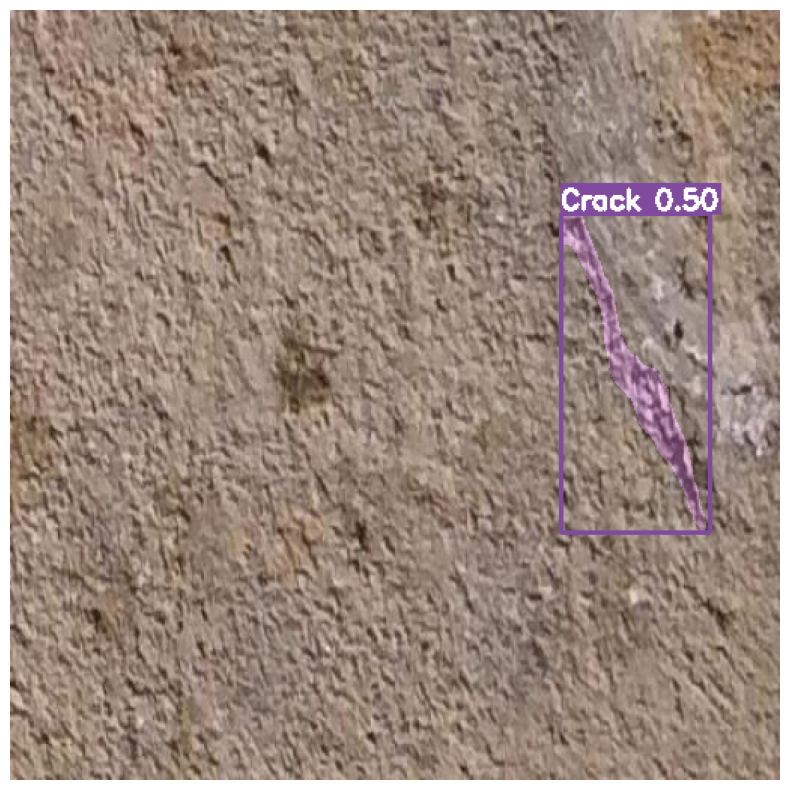

In [ ]:
# Step 2: Run on Random Image
# Randomly pick a validation image
random_img = random.choice(os.listdir(val_img_dir + '/images'))
img_path = os.path.join(val_img_dir + '/images', random_img)

# Run prediction
results = model(img_path)

# Plot results with overlay
plot_results(img_path, results, model)

In [ ]:
# Define directory paths
val_img_dir = "/content/aperi-1/valid"
val_mask_dir = "/content/aperi-1/valid/labels"


image 1/1 /content/aperi-1/valid/images/226_jpg.rf.d7104a3d7793fc88463f318d978f0dd1.jpg: 640x640 1 Spalling, 20.9ms
Speed: 2.9ms preprocess, 20.9ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Ground truth mask not found: /content/aperi-1/valid/labels/226_jpg.rf.d7104a3d7793fc88463f318d978f0dd1.png


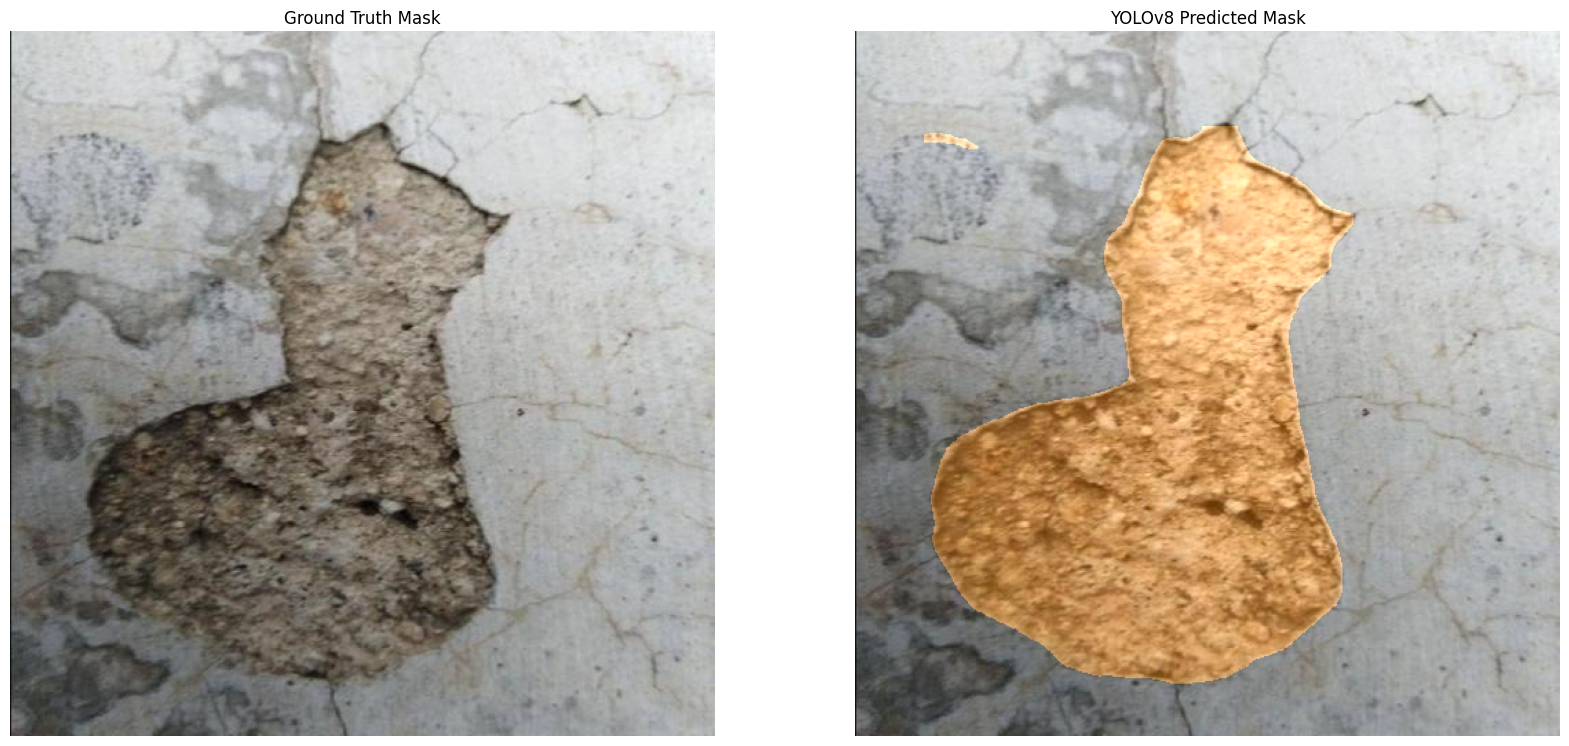

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Define a dictionary to store colors for each class
# This needs to be outside the functions to be accessible across calls
class_colors = {}

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:  # grayscale
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def overlay_mask(img, mask, alpha=0.5):
    """Overlay mask on image with random colors for each class."""
    classes = np.unique(mask)
    # Ensure colors are generated for classes in the mask if not already present
    for cls_id in classes:
        if cls_id not in class_colors:
            class_colors[cls_id] = [np.random.randint(0,255) for _ in range(3)]

    colored_mask = np.zeros_like(img, dtype=np.uint8)
    for cls_id in classes:
        colored_mask[mask == cls_id] = class_colors[cls_id]
    overlay = cv2.addWeighted(img, 1, colored_mask, alpha, 0)
    return overlay

def visualize_prediction_vs_gt(img_path, mask_path, results, model, alpha=0.5):
    """
    Display side-by-side: YOLOv8 predicted masks vs ground truth masks.
    """
    # Load original image
    img = load_image_or_npy(img_path)

    # ----------------- Ground Truth Overlay -----------------
    gt_mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED) # assuming mask is grayscale or single channel
    if gt_mask is None:
         print(f"Ground truth mask not found: {mask_path}")
         gt_overlay = img.copy() # Use original image if mask is missing
    else:
        if gt_mask.ndim == 3:
            gt_mask = gt_mask[:,:,0]  # use first channel if RGB
        # Resize gt_mask to match image size
        gt_mask_resized = cv2.resize(gt_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
        gt_overlay = overlay_mask(img, gt_mask_resized, alpha)


    # ----------------- YOLOv8 Prediction Overlay -----------------
    r = results[0]  # results object for this image
    pred_overlay = img.copy()

    if r.masks is not None:
        masks = r.masks.data.cpu().numpy()  # shape: (N, H, W)
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        # Resize masks to original image size and overlay
        for i, mask in enumerate(masks):
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]))
            mask_binary = (mask_resized > 0.5).astype(np.uint8)
            # Generate random color for this class if not already present
            if class_ids[i] not in class_colors:
                 class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[class_ids[i]]

            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]
            pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, alpha, 0)
    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot side by side -----------------
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_overlay)
    plt.title("YOLOv8 Predicted Mask")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
val_img_dir = "/content/aperi-1/valid/images"
val_mask_dir = "/content/aperi-1/valid/labels"

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)
    mask_file = os.path.join(val_mask_dir, random_img.replace(".jpg", ".png")) # assuming masks are png


    # Run YOLOv8 prediction
    # model must be loaded in a previous cell
    results = model(img_file)

    # Visualize side-by-side
    visualize_prediction_vs_gt(img_file, mask_file, results, model)

# With bounding box+instance segmentation


image 1/1 /content/aperi-1/valid/images/9583903_jpg.rf.98f0e7504e87fb9ac5f20c4e2feff530.jpg: 640x640 4 Efflorescences, 21.0ms
Speed: 3.7ms preprocess, 21.0ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)


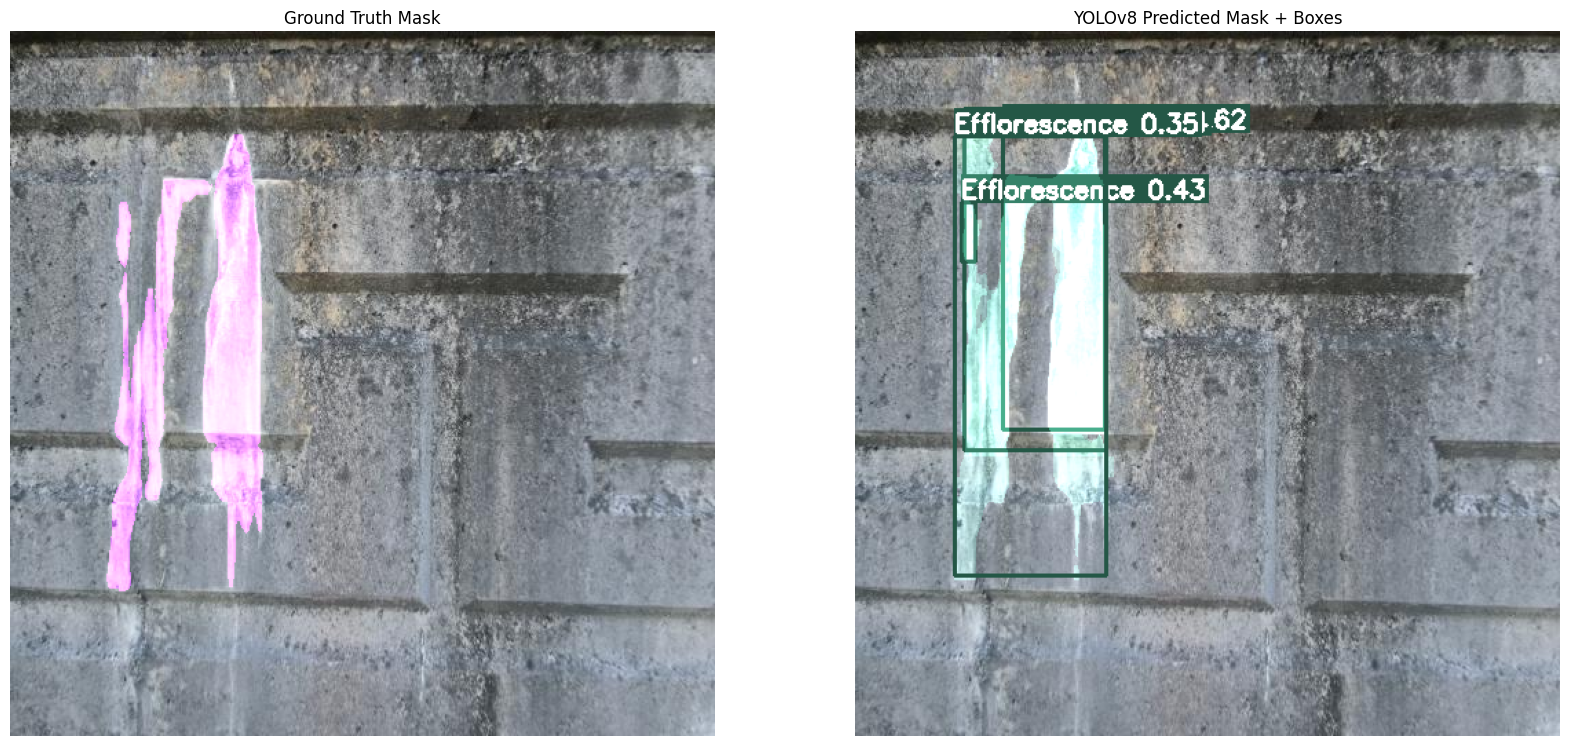

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tempfile

def load_image_or_npy(path):
    """Load image from .jpg/.png or .npy and return RGB uint8 array."""
    if path.endswith(".npy"):
        img = np.load(path)
        if img.ndim == 2:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        elif img.shape[2] == 1:
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        img = img.astype(np.uint8)
    else:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def overlay_mask(img, mask, alpha=0.5):
    """Overlay mask on image with random colors for each class."""
    classes = np.unique(mask)
    colors = {cls_id: [np.random.randint(0,255) for _ in range(3)] for cls_id in classes if cls_id != 0} # Exclude background for color generation
    colored_mask = np.zeros_like(img, dtype=np.uint8)
    for cls_id in classes:
        if cls_id != 0: # Don't color background
             colored_mask[mask == cls_id] = colors[cls_id]
    overlay = cv2.addWeighted(img, 1, colored_mask, alpha, 0)
    return overlay

def parse_yolo_segmentation(txt_path, img_shape):
    """Parses YOLO segmentation labels from a text file."""
    mask = np.zeros((img_shape[0], img_shape[1]), dtype=np.uint8)
    try:
        with open(txt_path, 'r') as f:
            for line in f.readlines():
                parts = list(map(float, line.strip().split()))
                cls_id = int(parts[0])
                # Convert normalized coordinates to pixel coordinates
                points = np.array(parts[1:]).reshape(-1, 2)
                points[:, 0] = points[:, 0] * img_shape[1]
                points[:, 1] = points[:, 1] * img_shape[0]
                points = points.astype(np.int32)
                # Fill the polygon on the mask
                cv2.fillPoly(mask, [points], cls_id + 1) # Use class_id + 1 to avoid conflict with background
    except FileNotFoundError:
        print(f"Warning: YOLO label file not found: {txt_path}")
        return None
    except Exception as e:
        print(f"Error parsing YOLO label file {txt_path}: {e}")
        return None
    return mask


def visualize_prediction_vs_gt(img_path, txt_path, model, alpha=0.5):
    """
    Display side-by-side: YOLOv8 predicted masks (with boxes & labels) vs ground truth masks from YOLO text files.
    """
    # Load original image
    img = load_image_or_npy(img_path)

    # ----------------- Ground Truth Overlay -----------------
    gt_mask = parse_yolo_segmentation(txt_path, img.shape[:2])

    if gt_mask is None:
         gt_overlay = img.copy() # Use original image if mask is missing
         print(f"Could not load ground truth mask for {img_path}. Displaying original image instead.")
    else:
         gt_overlay = overlay_mask(img.copy(), gt_mask, alpha)


    # ----------------- YOLOv8 Prediction Overlay -----------------
    pred_results = model(img_path)
    pred_overlay = img.copy()

    r = pred_results[0]
    if r.masks is not None:
        masks = r.masks.data.cpu().numpy()
        class_ids = r.boxes.cls.cpu().numpy().astype(int)
        confs = r.boxes.conf.cpu().numpy()
        class_names = model.names

        # Overlay masks and draw boxes + labels
        for i, mask in enumerate(masks):
            mask_resized = cv2.resize(mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
            mask_binary = (mask_resized > 0.5).astype(np.uint8)

            # Use shared class_colors dictionary if defined, otherwise generate here
            # Assuming class_colors is defined in a higher scope
            if class_ids[i] not in class_colors:
                 class_colors[class_ids[i]] = [np.random.randint(0,255) for _ in range(3)]
            color = class_colors[class_ids[i]]

            colored_mask = np.zeros_like(img, dtype=np.uint8)
            for c in range(3):
                colored_mask[:,:,c] = mask_binary * color[c]
            pred_overlay = cv2.addWeighted(pred_overlay, 1, colored_mask, alpha, 0)

            # Draw bounding box
            x1, y1, x2, y2 = map(int, r.boxes.xyxy[i].cpu().numpy())
            label = f"{class_names[class_ids[i]]} {confs[i]:.2f}"
            cv2.rectangle(pred_overlay, (x1, y1), (x2, y2), color, 2)
            (tw, th), baseline = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 2)
            cv2.rectangle(pred_overlay, (x1, y1 - th - baseline), (x1 + tw, y1), color, -1)
            cv2.putText(pred_overlay, label, (x1, y1 - 3), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 2)

    else:
      print(f"No predictions found for {img_path}")


    # ----------------- Plot side by side -----------------
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    plt.imshow(gt_overlay)
    plt.title("Ground Truth Mask")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(pred_overlay)
    plt.title("YOLOv8 Predicted Mask + Boxes")
    plt.axis('off')
    plt.show()

# ----------------- Example Usage -----------------
# Assuming val_img_dir and val_mask_dir are defined in a previous cell
val_img_dir = "/content/aperi-1/valid/images"
val_mask_dir = "/content/aperi-1/valid/labels" # This directory contains the .txt files

# Pick a random image file (filter for image extensions)
image_files = [f for f in os.listdir(val_img_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
if not image_files:
    print(f"No image files found in {val_img_dir}")
else:
    random_img = random.choice(image_files)
    img_file = os.path.join(val_img_dir, random_img)
    txt_file = os.path.join(val_mask_dir, random_img.replace(".jpg", ".txt").replace(".jpeg", ".txt").replace(".png", ".txt"))  # Correct mask extension

    # Run visualization
    # Assuming 'model' is defined (loaded) in a previous cell
    visualize_prediction_vs_gt(img_file, txt_file, model)